In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_zillow as w

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [2]:
df = w.acquire_zillow()

Using cached csv


In [3]:
df = w.wrangle_zillow()

In [4]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,age,county
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Central,19.0,Orange
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Central,50.0,Ventura
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Central,55.0,Orange
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,47.0,Los Angeles
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,53.0,Los Angeles


In [5]:
# for col in df.columns:
#     plt.hist(df[col])
#     plt.title(col)
#     plt.show()

In [6]:
train, validate, test = w.split_data(df)
train.shape, validate.shape, test.shape

((40063, 25), (17171, 25), (14309, 25))

 - H0: House age does not have a linear relationship with log error

 - Ha: House age does have a linear relationship with log error

Text(0.5, 1.0, 'There Seems To NOT Be A Linear Relationship Between Age and Log Error')

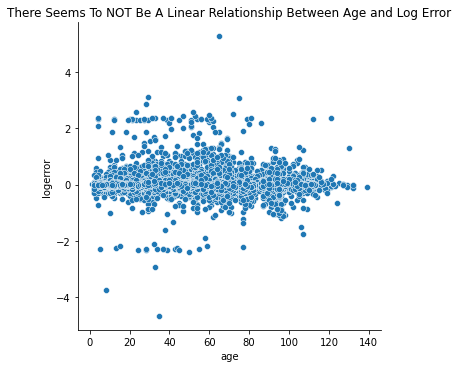

In [18]:
sns.relplot(x = 'age', y = 'logerror', data = train)
plt.title('There Seems To NOT Be A Linear Relationship Between Age and Log Error')

### Pearson's r...

In [11]:
# Set our alpha
alpha = .05

# Set what info we want and run Pearson's R on our two train sets
r, p = pearsonr(train.age, train.logerror)

# Set our parameters to print our answer
if p > alpha:
    print(f'r-value = {round(r,5)}')
    print(f'p-value = {round(p,5)}')
    print('We fail to reject the null hypothesis')
else:
    print(f'r-value = {round(r,5)}')
    print(f'p-value = {round(p,5)}')
    print('The null hypothesis is rejected! ')

r-value = -0.00945
p-value = 0.05849
We fail to reject the null hypothesis


#### We fail to reject the null hypothesis which means we can not assume there seems to not be a linear relationship between house age and logerror.

2.) Does logerror differ significantly from county to county?

In [9]:
train.groupby(by='county').logerror.mean()

county
Los Angeles    0.015269
Orange         0.019722
Ventura        0.016019
Name: logerror, dtype: float64

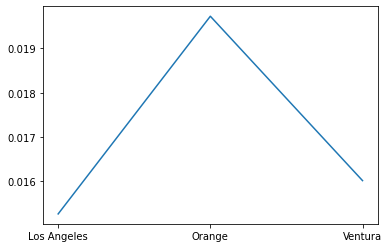

In [10]:
plt.plot(train.groupby(by='county').logerror.mean())

3.) Is there a correlation between logerror and age?